# DSCI 503 – Project 04

### Anthony Appiani 

#### import libraries and add ons

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Part 1: Loading the Dataset; Preliminary Analysis
#### Loading in and exploring Forest Cover dataset. 

In [2]:
fc = pd.read_csv('forest_cover.txt', sep='\t')
fc.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,29,5


#### Determining the size of the Dataset. 
The Dataset has 15,120 observations. fc has 15,120 rows and 13 columns

In [3]:
fc.shape

(15120, 13)

#### Inspecting the distribution of cover types

In [4]:
fc.loc[:,'Cover_Type'].value_counts().sort_index()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: count, dtype: int64

#### Creating a list of seven colors to be used as a palette in later plots

In [5]:
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

## Part 2: Distribution of Cover Type by Wilderness Area
#### Determining the distribution of the wilderness areas in the fc Dataset

In [6]:
fc.loc[:,'Wilderness_Area'].value_counts().sort_index()

Wilderness_Area
Cache la Poudre    4675
Comanche Peak      6349
Neota               499
Rawah              3597
Name: count, dtype: int64

####  Create a DataFrame to determine the how many regions of each cover type are in each of the four wilderness areas.

In [7]:
ct_by_wa = pd.crosstab(fc.loc[:,'Cover_Type'],fc.loc[:,'Wilderness_Area'])

ct_by_wa

Wilderness_Area,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
1,0,917,181,1062
2,20,940,66,1134
3,1297,863,0,0
4,2160,0,0,0
5,0,1304,0,856
6,1198,962,0,0
7,0,1363,252,545


#### Create a stacked bar chart to represent the ct_by_wa DataFrame visually 

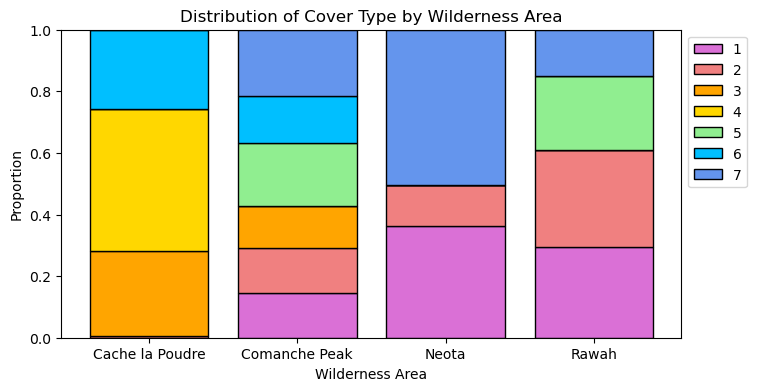

In [8]:
ct_by_wa_props = ct_by_wa/ct_by_wa.sum()
bb = np.cumsum(ct_by_wa_props) - ct_by_wa_props

plt.figure(figsize=[8,4])

for i in range(0,7):
    plt.bar(ct_by_wa_props.columns.values, ct_by_wa_props.iloc[i,:], label = ct_by_wa_props.index[i], 
            bottom = bb.iloc[i,:], color=palette[i],edgecolor='black')

plt.xlabel('Wilderness Area')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Wilderness Area')
plt.legend(bbox_to_anchor = [1,1])
plt.show()

## Part 3: Distribution of Cover Type by Soil Type
#### Start by creating a DataFrame to determine the number of regions of each cover type there are for each of the 40 soil types

In [9]:
ct_by_st = pd.crosstab(fc.loc[:,'Cover_Type'],fc.loc[:,'Soil_Type'])
ct_by_st

Soil_Type,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,1,9,5,...,114,230,184,0,3,0,0,80,79,49
2,0,3,12,20,0,7,1,9,81,67,...,97,255,184,12,1,2,0,7,3,3
3,121,283,133,462,55,248,0,0,717,89,...,0,5,0,0,0,0,0,0,0,0
4,139,94,799,133,39,244,0,0,170,24,...,0,0,0,0,0,0,0,0,0,0
5,0,61,0,129,0,0,0,0,64,154,...,87,100,115,4,0,0,0,0,0,0
6,95,182,18,87,71,151,0,0,1101,67,...,7,30,66,2,0,0,0,0,0,0
7,0,0,0,7,0,0,0,0,0,0,...,27,70,67,4,98,8,34,641,575,407


#### Creating a stacked bar chart to represent the distribution of soil type  

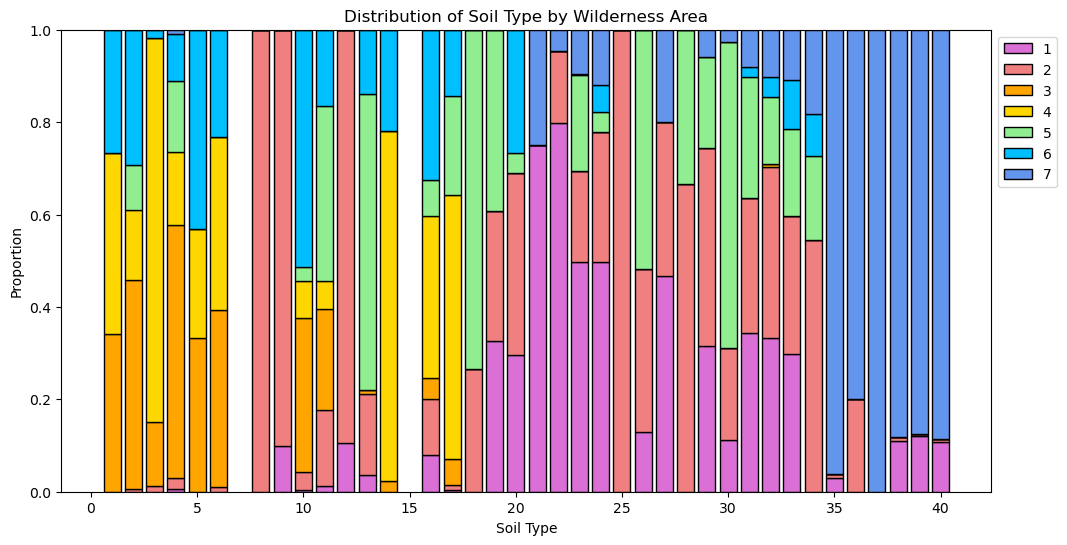

In [10]:
ct_by_st_props = ct_by_st/ct_by_st.sum()
bb = np.cumsum(ct_by_st_props) - ct_by_st_props

plt.figure(figsize=[12,6])

for i in range(0,7):
    plt.bar(ct_by_st_props.columns.values, ct_by_st_props.iloc[i,:], label = ct_by_st_props.index[i], 
            bottom = bb.iloc[i,:], color=palette[i],edgecolor='black')

plt.xlabel('Soil Type')
plt.ylabel('Proportion')
plt.title('Distribution of Soil Type by Wilderness Area')
plt.legend(bbox_to_anchor = [1,1])
plt.show()

## Part 4: Distribution of Elevation by Cover Type
##### start by calculating the average elevation for each of the seven cover types.

In [11]:
fc.loc[:,['Elevation','Cover_Type']].groupby('Cover_Type').mean()

,Elevation
Cover_Type,
1,3128.025926
2,2922.540278
3,2398.423148
4,2223.420370
5,2786.801389
6,2423.276852
7,3362.769907


#### Create histograms to visualize the distribution of elevations for each of the seven cover types

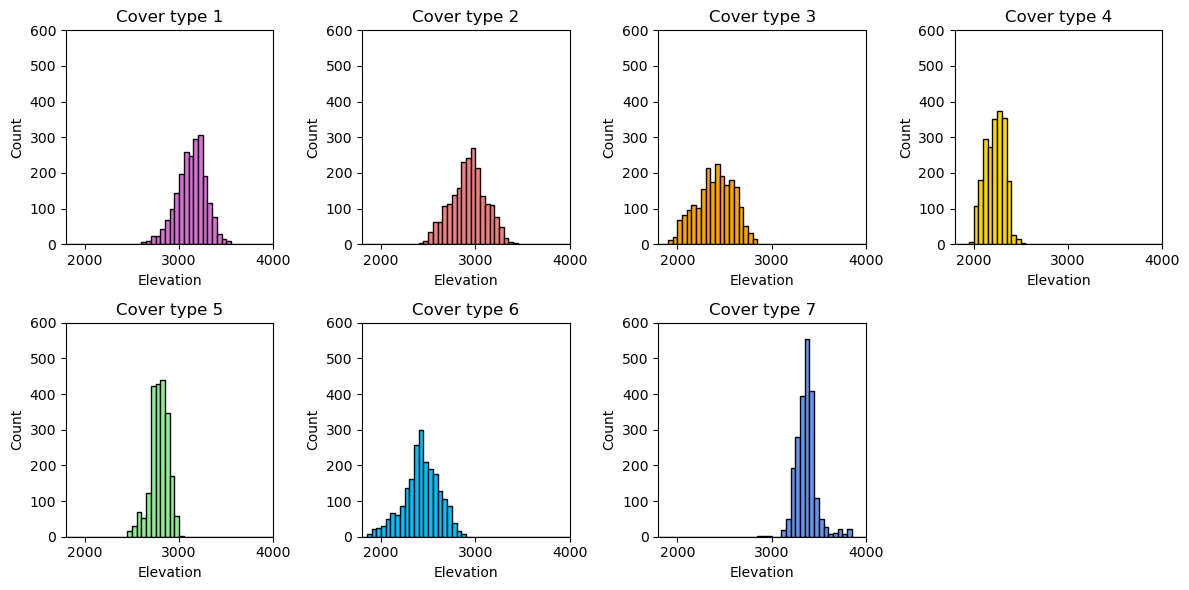

In [12]:
plt.figure(figsize=[12,6])

for c in range(0,7):
    
    plt.subplot(2,4,c+1)
    ct = fc.loc[:,'Cover_Type']== c+1
    plt.hist(fc.loc[ct,'Elevation'],  bins=np.arange(1800, 4050, 50), color = palette[c], edgecolor='black')
    plt.title("Cover type "+ str(c+1))
    plt.xlabel('Elevation')
    plt.ylabel('Count')
    plt.xlim([1800,4000])
    plt.ylim([0,600])
    
plt.tight_layout()
plt.show()

## Part 5: Creating Training, Validation, and Test Sets
#### Separating the categorical features, the numerical features, and the labels.

In [13]:
X_num = fc.iloc[:,0:10].values
X_cat = fc.iloc[:,10:12].values
y = fc.iloc[:,-1].values

print('Numerical Feature Array Shape:   ',X_num.shape)
print('Categorical Feature Array Shape: ',X_cat.shape)
print('Label Array Shape:               ',y.shape)

Numerical Feature Array Shape:    (15120, 10)
Categorical Feature Array Shape:  (15120, 2)
Label Array Shape:                (15120,)


#### Encode the categorical variables using one-hot encoding

In [14]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(X_cat)
X_enc = encoder.transform(X_cat)

print('Encoded Feature Array Shape: ',X_enc.shape)

Encoded Feature Array Shape:  (15120, 42)


#### Combining the numerical features with the encoded features.

In [15]:
X = np.hstack([X_num,X_enc])

print('Feature Array Shape: ',X.shape)

Feature Array Shape:  (15120, 52)


#### Splitting the data into training, validation, and test sets, using a 70/15/15 split.

In [16]:
X_train, X_hold, y_train, y_hold = train_test_split(X,y,test_size=.3,random_state=1, stratify = y)
X_valid, X_test, y_valid, y_test = train_test_split(X_hold,y_hold, test_size= .5, random_state =1, stratify = y_hold)

print('Training Features Shape:   ',X_train.shape)
print('Validation Features Shape: ',X_valid.shape)
print('Test Features Shape:       ',X_test.shape)

Training Features Shape:    (10584, 52)
Validation Features Shape:  (2268, 52)
Test Features Shape:        (2268, 52)


## Part 6: Logistic Regression Model
#### Creating a Logistic Regression Model 

In [17]:
lr_mod =LogisticRegression(solver='lbfgs', penalty=None, max_iter=1000, multi_class= 'multinomial')
lr_mod.fit(X_train,y_train)

train_acc = lr_mod.score(X_train,y_train)
valid_acc = lr_mod.score(X_valid, y_valid)

print('Training Accuracy:   ',train_acc.round(4))
print('Validation Accuracy: ',valid_acc.round(4))

Training Accuracy:    0.6165
Validation Accuracy:  0.6155


C:\Users\appia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Part 7: Decision Tree Models
#### Creating decision tree. Finding max depth for optimal decision tree model

In [18]:
dt_train_acc = []
dt_valid_acc = []
depth_range = range(2,31)

for i in depth_range:
    np.random.seed(1)
    temp_tree = DecisionTreeClassifier(max_depth=i)
    temp_tree.fit(X_train,y_train)
    dt_train_acc.append(temp_tree.score(X_train,y_train))
    dt_valid_acc.append(temp_tree.score(X_valid,y_valid))
    
dt_idx = np.argmax(dt_valid_acc)
dt_opt_depth = depth_range[dt_idx]
opt_train = dt_train_acc[dt_idx]
opt_valid = dt_valid_acc[dt_idx]

print('Optimal value for max_depth:           ',dt_opt_depth)
print('Training Accuracy for Optimal Model:   ',opt_train.round(4))
print('Validation Accuracy for Optimal Model: ',opt_valid.round(4))

Optimal value for max_depth:            18
Training Accuracy for Optimal Model:    0.9804
Validation Accuracy for Optimal Model:  0.772


#### Plotting the training and validation curves as a function of max_depth

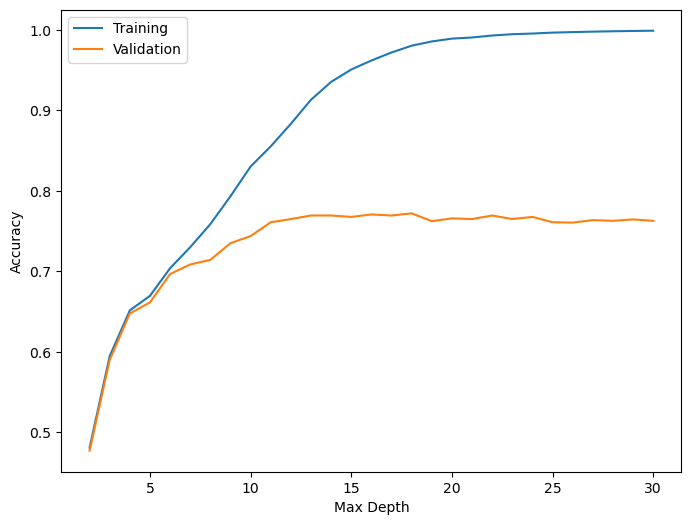

In [19]:
plt.figure(figsize=([8, 6]))
plt.plot(depth_range, dt_train_acc, label='Training')
plt.plot(depth_range, dt_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Part 8: Random Forest Models
#### Exploring random forest models and finding the max depth 

In [20]:
rf_train_acc = []
rf_valid_acc = []


for i in depth_range:
    np.random.seed(1)
    temp_forest = RandomForestClassifier(n_estimators=100,max_depth= i)
    temp_forest.fit(X_train,y_train)
    rf_train_acc.append(temp_forest.score(X_train,y_train))
    rf_valid_acc.append(temp_forest.score(X_valid,y_valid))
    
rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = depth_range[rf_idx]
opt_train = rf_train_acc[rf_idx]
opt_valid = rf_valid_acc[rf_idx]

print('Optimal value for max_depth:           ',rf_opt_depth)
print('Training Accuracy for Optimal Model:   ',opt_train.round(4))
print('Validation Accuracy for Optimal Model: ',opt_valid.round(4))

Optimal value for max_depth:            28
Training Accuracy for Optimal Model:    1.0
Validation Accuracy for Optimal Model:  0.8677


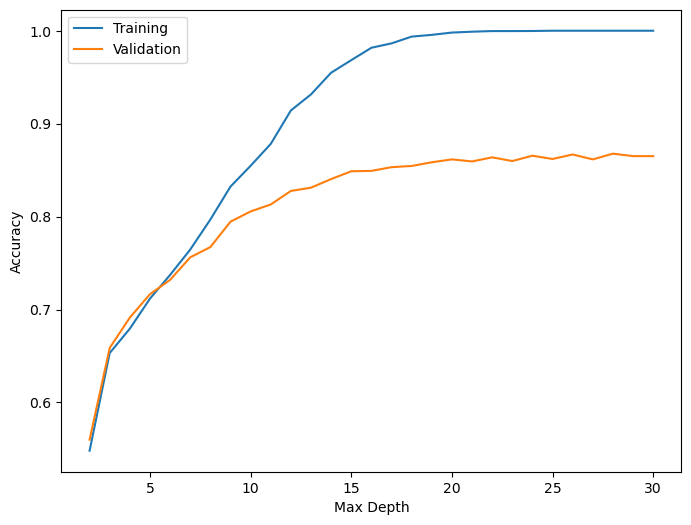

In [21]:
plt.figure(figsize=([8, 6]))
plt.plot(depth_range, rf_train_acc, label='Training')
plt.plot(depth_range, rf_valid_acc, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Part 9: Create and Evaluate Final Model 
#### The random forest had the highest Validation accuracy at almost 87%. The optimal depth is 28. 

In [22]:
np.random.seed(1)
final_model = RandomForestClassifier(n_estimators=100,max_depth= 28)
final_model.fit(X_train,y_train)
train_acc = final_model.score(X_train,y_train)
valid_acc = final_model.score(X_valid,y_valid)
test_acc = final_model.score(X_test,y_test)

print('Training Accuracy for Final Model:   ',train_acc.round(4))
print('Validation Accuracy for Final Model: ',valid_acc.round(4))
print('Testing Accuracy for Final Model:    ',test_acc.round(4))

Training Accuracy for Final Model:    1.0
Validation Accuracy for Final Model:  0.8677
Testing Accuracy for Final Model:     0.8593


#### Creating a confusion matrix showing the models performance on the test set

In [23]:
test_pred = final_model.predict(X_test)
cm = confusion_matrix(y_test,test_pred)
cm_df = pd.DataFrame( data = cm,
                    index = [1,2,3,4,5,6,7],
                    columns = [1,2,3,4,5,6,7])

cm_df

,1,2,3,4,5,6,7
1,236,63,2,0,5,0,18
2,53,239,6,0,13,10,3
3,0,2,262,18,2,40,0
4,0,0,6,313,0,5,0
5,0,11,4,0,305,4,0
6,0,0,33,11,1,279,0
7,8,1,0,0,0,0,315


#### Generating a classification report for the models performance on the test set

In [24]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           1       0.79      0.73      0.76       324
           2       0.76      0.74      0.75       324
           3       0.84      0.81      0.82       324
           4       0.92      0.97      0.94       324
           5       0.94      0.94      0.94       324
           6       0.83      0.86      0.84       324
           7       0.94      0.97      0.95       324

    accuracy                           0.86      2268
   macro avg       0.86      0.86      0.86      2268
weighted avg       0.86      0.86      0.86      2268

